In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


# Read the CSV file
data_frame = pd.read_csv('../data/Customer_Churn.csv')


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


This is a detailed info about the features of the dataset, we can learn many things from this, for example, we get a sense of which are the nomimnal (Categorical) features (with object datatypes) and which are not. It also shows us how many records (rows) we have in this dataset, in this case, it's 3150.

In [2]:


# Basic information about the dataset
print("\n=== Dataset Info ===")
print(data_frame.info())  # Shows data types and missing values



=== Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       3150 non-null   int64  
 1   Call Failure             3150 non-null   int64  
 2   Complains                3150 non-null   object 
 3   Charge Amount            3150 non-null   int64  
 4   Freq. of use             3150 non-null   int64  
 5   Freq. of SMS             3150 non-null   int64  
 6   Distinct Called Numbers  3150 non-null   int64  
 7   Age Group                3150 non-null   int64  
 8   Plan                     3150 non-null   object 
 9   Status                   3150 non-null   object 
 10  Age                      3150 non-null   int64  
 11  Customer Value           3150 non-null   float64
 12  Churn                    3150 non-null   object 
dtypes: float64(1), int64(8), object(4)
memory usage: 320.0+ 

In [3]:

# Summary statistics for all numeric columns
print("\n=== Summary Statistics ===")
print(data_frame.describe().round(2))  # Shows count, mean, std, min, 25%, 50%, 75%, max



=== Summary Statistics ===
            ID  Call Failure  Charge Amount  Freq. of use  Freq. of SMS  \
count  3150.00       3150.00        3150.00       3150.00       3150.00   
mean   1575.50          7.63         129.88         69.46         73.17   
std     909.47          7.26         102.79         57.41        112.24   
min       1.00          0.00          20.00          0.00          0.00   
25%     788.25          1.00          50.00         27.00          6.00   
50%    1575.50          6.00         100.00         54.00         21.00   
75%    2362.75         12.00         200.00         95.00         87.00   
max    3150.00         36.00         400.00        255.00        522.00   

       Distinct Called Numbers  Age Group      Age  Customer Value  
count                  3150.00    3150.00  3150.00         3150.00  
mean                     23.51       2.83    31.00          470.97  
std                      17.22       0.89     8.83          517.02  
min                 

This is pretty helpful, as we learn there's no missing values in this specific dataset, which saves us the trouble of trying to handle them.

In [4]:
# Check for missing values
print("\n=== Missing Values ===")
print(data_frame.isnull().sum())



=== Missing Values ===
ID                         0
Call Failure               0
Complains                  0
Charge Amount              0
Freq. of use               0
Freq. of SMS               0
Distinct Called Numbers    0
Age Group                  0
Plan                       0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64


Sample of the dataset now that we understand the main characterastics of the dataset.

In [5]:

# Display first few rows
print("\n=== First Few Rows ===")
print(data_frame.head())




=== First Few Rows ===
   ID  Call Failure Complains  Charge Amount  Freq. of use  Freq. of SMS  \
0   1             3        no            100            25            32   
1   2             8        no            100            65             0   
2   3             0        no            200             0             0   
3   4            10        no            100            54           327   
4   5            10        no            100            60             0   

   Distinct Called Numbers  Age Group      Plan      Status  Age  \
0                       11          3  pre-paid      active   30   
1                       13          2  pre-paid      active   25   
2                        0          2  pre-paid  not-active   25   
3                       20          2  pre-paid      active   25   
4                       31          1  pre-paid      active   15   

   Customer Value Churn  
0         193.120    no  
1         194.400   yes  
2           0.000   yes  
3     

This helps us see how often does the customers churn, for example, notice that even though most of the customers don't complain (92%), it's not a good indicator that they're satisfied, as we see in the churn results, that around 84% of them do churn...we can see as well that most customers favour pre-paid plan(92%) over post-paid. 

In [6]:
# Basic statistics for categorical columns
print("\n=== Categorical Columns Summary ===")
categorical_columns = data_frame.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"\nCounts for {col}:")
    print(data_frame[col].value_counts())
    print(f"\nPercentages for {col}:")
    counts = data_frame[col].value_counts(normalize=True) * 100
    for value, percentage in counts.items():
        print(f"{value}: {percentage:.2f}%") 



=== Categorical Columns Summary ===

Counts for Complains:
Complains
no     2909
yes     241
Name: count, dtype: int64

Percentages for Complains:
no: 92.35%
yes: 7.65%

Counts for Plan:
Plan
pre-paid     2905
post-paid     245
Name: count, dtype: int64

Percentages for Plan:
pre-paid: 92.22%
post-paid: 7.78%

Counts for Status:
Status
active        2368
not-active     782
Name: count, dtype: int64

Percentages for Status:
active: 75.17%
not-active: 24.83%

Counts for Churn:
Churn
yes    2655
no      495
Name: count, dtype: int64

Percentages for Churn:
yes: 84.29%
no: 15.71%


A visualised distribution of the churn class label. (task 2)

/tmp/ipykernel_212184/852200220.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_frame, x='Churn', ax=ax1, palette=['#ff9999', '#66b3ff'])


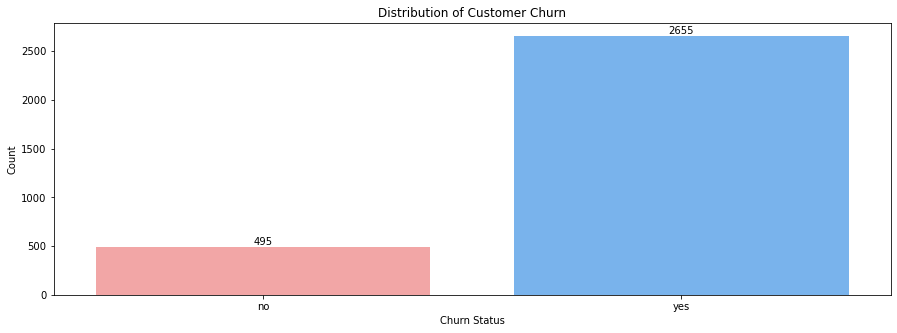

In [7]:
# Create a figure with multiple subplots
fig, (ax1) = plt.subplots(1,figsize=(15, 5))

# Plot 1: Bar plot of churn distribution
sns.countplot(data=data_frame, x='Churn', ax=ax1, palette=['#ff9999', '#66b3ff'])
ax1.set_title('Distribution of Customer Churn')
ax1.set_xlabel('Churn Status')
ax1.set_ylabel('Count')

# Add count labels on top of each bar
for i in ax1.containers:
    ax1.bar_label(i)


Task 3:
The Age group is the independant variable, presented on the x-axis. We can learn from this graph that people of Group ages 2 and 3, (ranges around 25-45) are the most people customers who are subscribed in the first place, and they're also the most customers to churn.

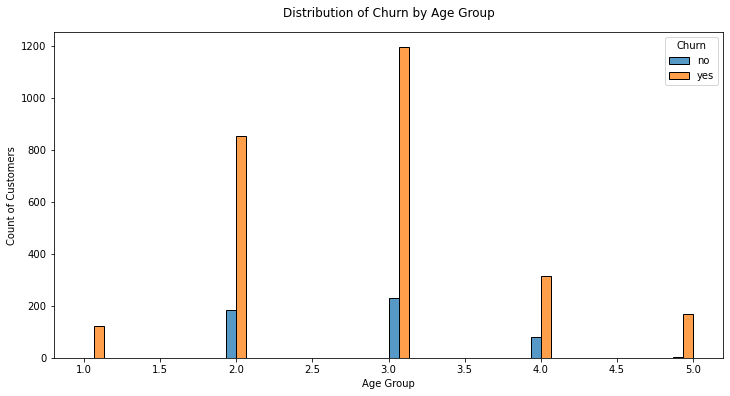

In [8]:
# Create a figure with appropriate size
plt.figure(figsize=(12, 6))

# Create a histogram showing churn distribution for each age group
# Using sns.histplot for better visualization of categorical data
sns.histplot(data=data_frame, 
            x='Age Group',
            hue='Churn',
            multiple="dodge"  # This makes bars appear side by side
            )      

# Customize the plot
plt.title('Distribution of Churn by Age Group', fontsize=12, pad=15)
plt.xlabel('Age Group')
plt.ylabel('Count of Customers')

# Show the plot
plt.show()

### Task 4: 
**charge amount** is the independent variable in this case. 

#### Conclusions 
It seems that the charge amount isn't the main cause for users to churn, because it doesn't matter which pricing they have, most users of this sub-group would churn eventually, we see charge amount with 100 and 50 are the most to churn, that's because they're the ones with the most users (Checkout charge amount analysis below)

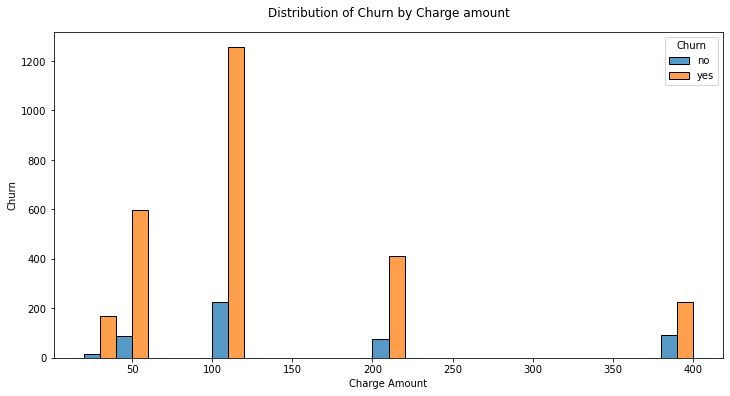

In [9]:
plt.figure(figsize=(12,6))

# A histogram showing churn distribution among charge amount
sns.histplot(data=data_frame,
             x='Charge Amount',
             hue='Churn',
             multiple='dodge')

# Customizing the plot
plt.title("Distribution of Churn by Charge amount", fontsize=12, pad=15)
plt.xlabel("Charge Amount")
plt.ylabel("Churn")

plt.show()

### Task 5:

Frequence of charge amounts and all the unique -amounts-, I thought there was something worng with the graph above, given how separated the boxes, but now it's obvious, the Charge amounts are discrete values, which explains the discrete nature of the graph...

In [10]:
# Show unique charge amounts
print("Unique Charge Amounts in the dataset:")
print(sorted(data_frame['Charge Amount'].unique()))

# Show frequency of each charge amount
print("\nFrequency of each Charge Amount:")
print(data_frame['Charge Amount'].value_counts().sort_index())

Unique Charge Amounts in the dataset:
[20, 50, 100, 200, 400]

Frequency of each Charge Amount:
Charge Amount
20      184
50      683
100    1483
200     485
400     315
Name: count, dtype: int64


### Task 6:

#### Tools and motivation

I've decided to use a **_heatmap_** to visualise the correlations between features, because if I were to draw scatter plots for each two variables, I'll need (with 10 features) n(n-1)/2 = 45 plots!
A heatmap can also help with avoiding **_multicolinearity_**, in the Assignment description: "Based on the correlation, you have to decide which features to stay for the learning stage and which can be deleted." This heatmap graph will be of great help on deciding which features to stay and which not, by avoiding **_multicolinearity_**.

#### First steps 
1. First I need to map all -objects- types into a numeric representation, these are: "Complain, Status, Churn and Plan. 

In [11]:
data_frame["Churn"] = data_frame["Churn"].map({'no': 0, 'yes': 1})
data_frame["Complains"] = data_frame["Complains"].map({'no': 0, 'yes': 1})
data_frame["Status"] = data_frame["Status"].map({'not-active': 0, 'active': 1})
# Get dummies here instead of map, because map creates an artificial numeric relationship
# between pre-paid and post-paid, which doesn't exist, unlike yes/no, active/non-active
data_frame = pd.get_dummies(data_frame, columns=['Plan']) 

2. Now, drawing the heatmap itself

#### Explaination:
- The values range from -1 (perfect negative correlation) to +1 (perfect positive correlation)
- 0 indicates no linear correlation

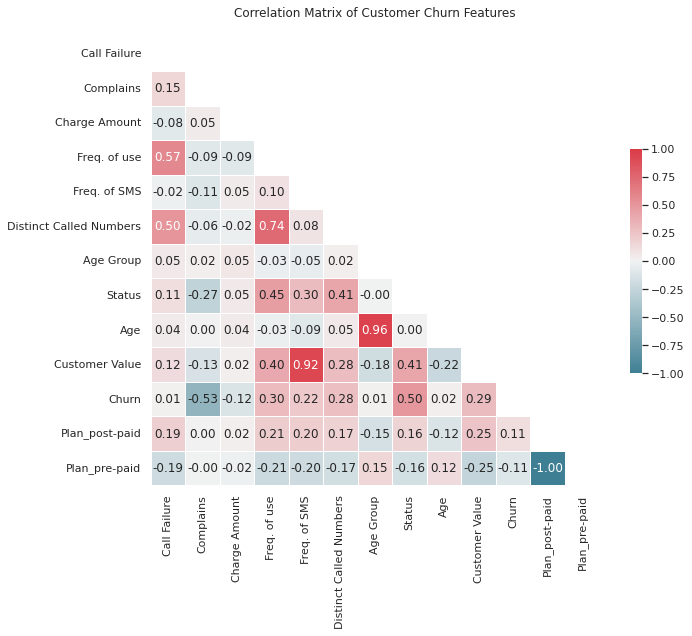

In [12]:
def plot_correlation_heatmap(data_frame):
    """
    Creates and displays a correlation heatmap for all numeric features in the dataset.
    
    Parameters:
        data_frame (pandas.DataFrame): The dataset to analyze, with ID column to be excluded
    
    The function will:
        1. Calculate correlations between all numeric columns (excluding ID)
        2. Create a masked triangular heatmap for better readability
        3. Display correlation values with 2 decimal places
    """
    # Remove ID column and calculate correlation matrix
    correlation_matrix = data_frame.drop('ID', axis=1).corr()
    
    # Set the visual style for better appearance
    sns.set_theme(style="white")
    
    # Create a mask for the upper triangle
    # We do this because correlation matrices are symmetrical,
    # so we only need to show half to avoid redundancy
    mask = np.zeros_like(correlation_matrix, dtype=bool)
    mask[np.triu_indices_from(mask)] = True
    
    # Create the figure with a reasonable size
    plt.figure(figsize=(11, 9))
    
    # Generate a blue-red color palette centered at 0
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    
    # Create and customize the heatmap
    sns.heatmap(correlation_matrix, 
                mask=mask,                  # Apply the triangular mask
                cmap=cmap,                  # Use our custom colormap
                vmax=1,                     # Set maximum correlation value
                center=0,                   # Center the colormap at 0
                square=True,                # Make cells square
                linewidth=.5,               # Add thin lines between cells
                cbar_kws={'shrink': .5},   # Customize the colorbar
                annot=True,                 # Show correlation values
                fmt='.2f')                  # Format to 2 decimal places
    
    # Add title and adjust layout
    plt.title('Correlation Matrix of Customer Churn Features', pad=20)
    plt.tight_layout()
    
    # Display the plot
    plt.show()

plot_correlation_heatmap(data_frame)


### Analysis of the heatmap plot:
1. Very high correlation between Customer value and Freq. of SMS, this requires to drop one of them before starting to train the model to avoid multicolinearity.

2. Pre-paid or Post-paid columns, one of them will be dropped, because if it's not pre-paid, then it can be concluded directly that it's postpaid.

3. For deciding between keeping Age or Age Group: if age group 2 (let's say ages 25-35) shows different churn behavior than age group 3 (ages 36-45), the exact transition point might actually be at age 32, not 35. By using the continuous Age variable, we allow our models to find these natural breakpoints in the data. That's why Age Group will be dropped, and Age continous field will be kept.

In [13]:
# Dropping unwanted columns 
# set axis to 1 indiciating that we're dropping columns, not rows (0)
data_frame = data_frame.drop(['ID', 'Age Group', 'Plan_post-paid', 'Freq. of SMS'], axis=1) 

# Verify the columns were dropped
print("Remaining columns:")
print(data_frame.columns.tolist())

# Re-print the heatmap 
plot_correlation_heatmap(data_frame)

Remaining columns:
['Call Failure', 'Complains', 'Charge Amount', 'Freq. of use', 'Distinct Called Numbers', 'Status', 'Age', 'Customer Value', 'Churn', 'Plan_pre-paid']


KeyError: "['ID'] not found in axis"

### Analysis of the new plot
1. Complains and Churn (-0.53): This is particularly interesting because it suggests that customers who formally complain are actually less likely to churn. This might indicate that customers who take the time to complain are more invested in the service and are giving the company a chance to address their concerns.

2. Frequency of use and Call Failure (0.57): This moderate positive correlation suggests that more frequent users naturally experience more call failures, which is expected given higher usage.

3. Frequency of use and Distinct Called Numbers (0.74): This remains the strongest positive correlation, indicating that customers who make more calls tend to contact more unique numbers. 

### Final Step, splitting the data

This is where sickit library comes in handy. The training and testing data set will be saved as a .npy files for quick processing during training and testing the models.

In [15]:
# This way, X has all the features that we might want to distribute the Churn feature across
X = data_frame.drop('Churn', axis=1)
Y = data_frame['Churn']

# Creating the split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Save these splits for later use with training and testing the models
np.save('../data/X_train', X_train)
np.save('../data/X_test', X_train)
np.save('../data/Y_train', Y_train)
np.save('../data/Y_test', Y_test)